Datasets :- https://www.kaggle.com/datasets/camnugent/california-housing-prices

# STEP 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET

In [2]:
df = pd.read_csv("./Datasets/California_Housing.csv")

# STEP 3: BASIC EDA

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print(f"Shape: {df.shape}, (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

Shape: (20640, 10), (Rows: 20640, Columns: 10)


In [7]:
# check Missing Values

missing_value = df.isnull().sum()
missing_percentage = (missing_value / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_value,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


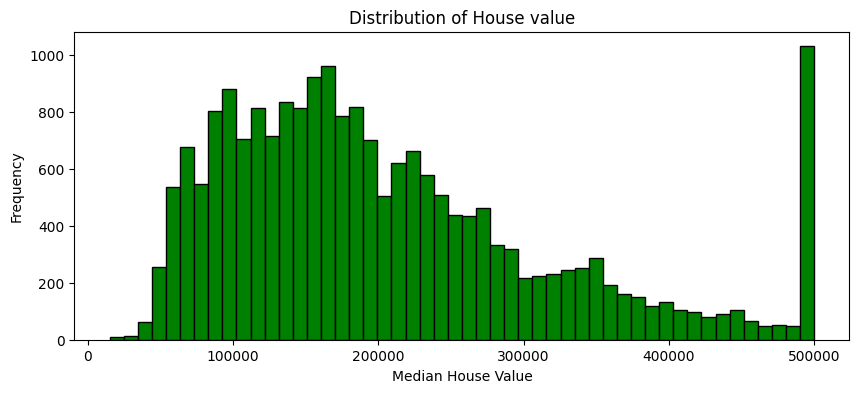

In [8]:
# Visulize Target Variable

plt.figure(figsize=(10,4))
plt.hist(df['median_house_value'], bins=50, color='green', edgecolor='black')
plt.title("Distribution of House value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
# Select Numerical Columns only

numerical_columns = df.select_dtypes(include=('float64', 'int64'))

numerical_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [11]:
# Correlation Analysis with Numerical Features

corr = numerical_columns.corr()['median_house_value'].sort_values(ascending=False)
print(corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


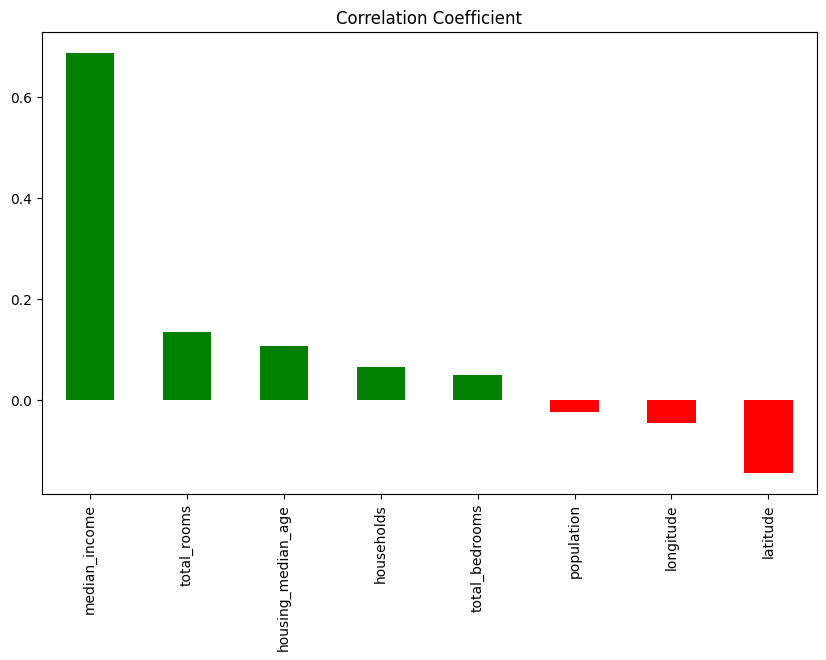

In [12]:
plt.figure(figsize=(10,6))
corr.drop('median_house_value').plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr.drop('median_house_value')])
plt.title("Correlation with Median House Value")
plt.title("Correlation Coefficient")
plt.show()

# STEP 4: Handle Missing Values

In [13]:
# check missing values

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing percentage": missing_percentage
})

print("Missing Values Before Fill with Median values")
print(missing_df[missing_df["Missing Count"] > 0])

Missing Values Before Fill with Median values
                Missing Count  Missing percentage
total_bedrooms            207            1.002907


In [14]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [15]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Counts": missing,
    "Missing Percentage": missing_percentage
})

print("Missing Values Before Fill with Median values")
print(missing_df[missing_df['Missing Counts'] > 0])

Missing Values Before Fill with Median values
Empty DataFrame
Columns: [Missing Counts, Missing Percentage]
Index: []


# STEP 5: Feature Selection/Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1, errors='ignore')
y = df['median_house_value']

In [18]:
X.shape

(20640, 8)

In [19]:
y.shape

(20640,)

# STEP 6: Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
X_train.shape

(16512, 8)

In [23]:
y_train.shape

(16512,)

In [24]:
X_test.shape

(4128, 8)

In [25]:
y_test.shape

(4128,)

In [26]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [27]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

# STEP 7: Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 8: Train SVR Model with Linear kernel

In [30]:
from sklearn.svm import SVR

In [31]:
model = SVR(kernel='linear', C=100)
model.fit(X_train_scaler, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [32]:
model.score(X_test_scaler, y_test)

0.5845179146126923

In [33]:
y_pred = model.predict(X_test_scaler)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Sqared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Mean Sqared Error: 5444514549.8978
Mean Absolute Error: 51443.7697
R2 Score: 0.5845
RMSE: 73786.9538


# STEP 9: SVR WITH RBF KERNEL

In [ ]:
model_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model_rbf